In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:\\Machine Learning\\Machine-Learning-master\\Datasets\\regression_train.csv')
df.head()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,output
0,8,279,C,14.451155,1139.0,1.0,9.302908,1.0,M,p,86.108947
1,1,108,H,14.207448,1656.0,1.0,7.220130,0.0,M,p,42.606833
2,8,258,A,19.220830,2817.0,1.0,8.727214,1.0,M,p,85.625961
3,4,147,A,15.752732,1948.0,1.0,6.078818,1.0,M,p,53.656277
4,5,230,H,10.195407,1336.0,1.0,4.749185,0.0,M,p,64.925051


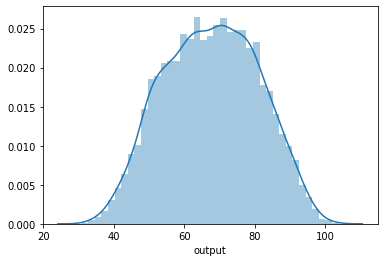

In [3]:
import seaborn as sns
sns.distplot(df['output'])

In [4]:
df.dtypes

data1       int64
data2       int64
data3      object
data4     float64
data5     float64
data6     float64
data7     float64
data8     float64
data9      object
data10     object
output    float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data1   10000 non-null  int64  
 1   data2   10000 non-null  int64  
 2   data3   10000 non-null  object 
 3   data4   10000 non-null  float64
 4   data5   9999 non-null   float64
 5   data6   9997 non-null   float64
 6   data7   9998 non-null   float64
 7   data8   9999 non-null   float64
 8   data9   9999 non-null   object 
 9   data10  9999 non-null   object 
 10  output  9999 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 859.5+ KB


In [6]:
corr = df.corr()
corr.sort_values(['output'], ascending = False, inplace = True)
df2 = pd.DataFrame(corr.output)
df2

,output
output,1.000000
data2,0.867936
data4,0.406100
data7,0.212560
data1,0.185539
data5,0.015307
data8,0.008142
data6,-0.009857


In [7]:
objList = df.select_dtypes(include = 'object').columns
print(objList)

Index(['data3', 'data9', 'data10'], dtype='object')


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in objList:
    df[feature] = le.fit_transform(df[feature].astype(str))

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data1   10000 non-null  int64  
 1   data2   10000 non-null  int64  
 2   data3   10000 non-null  int32  
 3   data4   10000 non-null  float64
 4   data5   9999 non-null   float64
 5   data6   9997 non-null   float64
 6   data7   9998 non-null   float64
 7   data8   9999 non-null   float64
 8   data9   10000 non-null  int32  
 9   data10  10000 non-null  int32  
 10  output  9999 non-null   float64
dtypes: float64(6), int32(3), int64(2)
memory usage: 742.3 KB
None


In [9]:
df['data5'].fillna(df['data5'].median(), inplace = True)
df['data6'].fillna(df['data6'].median(), inplace = True)
df['data7'].fillna(df['data7'].median(), inplace = True)
df['data8'].fillna(df['data8'].median(), inplace = True)
df['output'].fillna(df['output'].median(), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data1   10000 non-null  int64  
 1   data2   10000 non-null  int64  
 2   data3   10000 non-null  int32  
 3   data4   10000 non-null  float64
 4   data5   10000 non-null  float64
 5   data6   10000 non-null  float64
 6   data7   10000 non-null  float64
 7   data8   10000 non-null  float64
 8   data9   10000 non-null  int32  
 9   data10  10000 non-null  int32  
 10  output  10000 non-null  float64
dtypes: float64(6), int32(3), int64(2)
memory usage: 742.3 KB


In [10]:
X= df.drop('output',axis=1)
Y = df.loc[:,['output']].values
Y.shape

(10000, 1)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X.shape

(10000, 10)

In [12]:
Y = Y.reshape(-1)
Y.shape

(10000,)

In [13]:
#test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() #training the model
reg = lr.fit(X_train, y_train)

In [15]:
y_pred = reg.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error: %.2f'
      % mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
R2= r2_score(y_test, y_pred)

Mean squared error: 14.06
Coefficient of determination: 0.92


In [17]:
prediction_output = pd.DataFrame(data = [y_test,y_pred],index = ['y_test','y_predict'])
prediction_output.transpose()

,y_test,y_predict
0,64.917312,64.924357
1,70.417628,70.405696
2,68.954544,68.947105
3,60.761053,60.763701
4,72.914921,72.904768
...,...,...
2995,57.811705,57.832837
2996,76.317404,76.304101
2997,41.214637,41.222755
2998,75.748317,75.756083


In [27]:
print('Weights : ',lr.coef_)
print('Intercept : ',lr.intercept_)


Weights :  [ 3.47045968e+00  1.15244661e+01  2.06900434e-03  5.20144147e+00
  2.81279235e-03  2.84661246e-03  2.88182516e+00  3.43426940e-03
 -1.95941955e-01 -2.00270588e-01]
Intercept :  67.66718501244965
